In [1]:
# Install requirements
!pip install gensim pyLDAvis scikit-learn nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0

In [5]:
# Step 1: Import Libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim import corpora
import gensim
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Step 2: Create Dataset
documents = [
    "Climate change is affecting forests and wildlife",
    "Technology and data analysis improve weather forecasting",
    "The ocean is full of diverse marine life",
    "Artificial intelligence helps in medical data analysis",
    "Global warming increases sea levels and affects biodiversity",
    "Machine learning and data science are transforming industries",
    "Wildlife conservation is crucial for maintaining balance",
    "Natural language processing is a field of artificial intelligence",
    "Rivers provide fresh water for human survival",
    "Data visualization makes analysis easier to understand"
]

In [7]:
# Step 3: Preprocessing
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text.lower())  # lowercase + tokenize
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]  # remove punctuation + stopwords
    return tokens

processed_docs = [preprocess(doc) for doc in documents]


In [8]:
# Step 4: TF-IDF Analysis
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("Top TF-IDF words per document:")
for i, row in enumerate(tfidf_df.values):
    top10 = row.argsort()[-10:][::-1]
    print(f"Doc {i+1}: {[vectorizer.get_feature_names_out()[j] for j in top10]}")

Top TF-IDF words per document:
Doc 1: ['affecting', 'forests', 'change', 'climate', 'wildlife', 'understand', 'transforming', 'human', 'helps', 'global']
Doc 2: ['weather', 'technology', 'improve', 'forecasting', 'analysis', 'data', 'biodiversity', 'artificial', 'increases', 'affects']
Doc 3: ['ocean', 'life', 'marine', 'diverse', 'wildlife', 'improve', 'human', 'helps', 'global', 'fresh']
Doc 4: ['helps', 'medical', 'artificial', 'intelligence', 'analysis', 'data', 'wildlife', 'forecasting', 'increases', 'improve']
Doc 5: ['increases', 'affects', 'warming', 'levels', 'biodiversity', 'sea', 'global', 'easier', 'improve', 'human']
Doc 6: ['industries', 'transforming', 'learning', 'machine', 'science', 'data', 'balance', 'forecasting', 'improve', 'human']
Doc 7: ['balance', 'maintaining', 'conservation', 'crucial', 'wildlife', 'field', 'increases', 'improve', 'human', 'helps']
Doc 8: ['language', 'natural', 'field', 'processing', 'artificial', 'intelligence', 'biodiversity', 'change', 'i


Most similar to 'data': [('weather', 0.2706611752510071), ('conservation', 0.25472381711006165), ('water', 0.2406284064054489), ('ocean', 0.21077539026737213), ('change', 0.1863066852092743)]


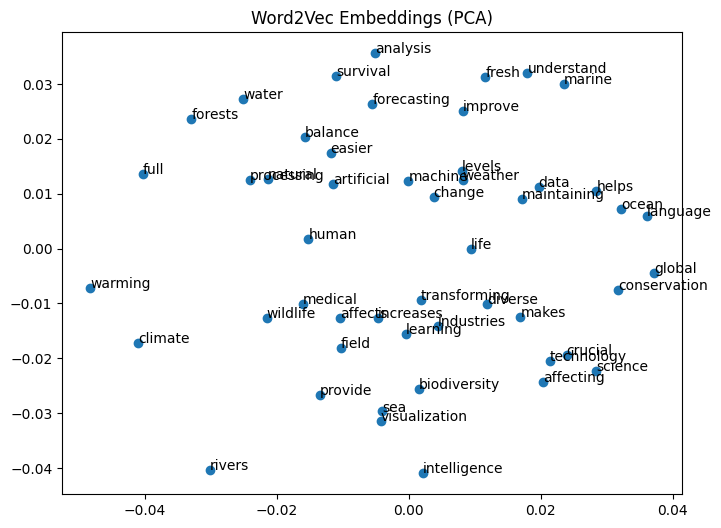

In [9]:
# Step 5: Word2Vec
w2v_model = Word2Vec(sentences=processed_docs, vector_size=50, window=5, min_count=1, workers=4)
print("\nMost similar to 'data':", w2v_model.wv.most_similar("data", topn=5))

# PCA visualization of embeddings
words = list(w2v_model.wv.key_to_index.keys())
vectors = [w2v_model.wv[w] for w in words]
pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)
plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (coords[i,0], coords[i,1]))
plt.title("Word2Vec Embeddings (PCA)")
plt.show()

In [10]:
# Step 6: Topic Modeling (LDA)
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(text) for text in processed_docs]

lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10, random_state=42)

print("\nLDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis


LDA Topics:
Topic 0: 0.062*"wildlife" + 0.035*"water" + 0.035*"provide" + 0.035*"human" + 0.035*"fresh" + 0.035*"survival" + 0.035*"rivers" + 0.035*"maintaining" + 0.035*"conservation" + 0.035*"balance"
Topic 1: 0.066*"analysis" + 0.065*"data" + 0.037*"increases" + 0.037*"global" + 0.037*"easier" + 0.037*"visualization" + 0.037*"biodiversity" + 0.037*"levels" + 0.037*"medical" + 0.037*"affects"
Topic 2: 0.067*"data" + 0.039*"artificial" + 0.039*"intelligence" + 0.038*"machine" + 0.038*"learning" + 0.038*"science" + 0.038*"industries" + 0.038*"transforming" + 0.038*"language" + 0.038*"field"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.113008 -0.003169       1        1  35.304075
1     -0.060982 -0.058396       2        1  33.201935
2     -0.052026  0.061565       3        1  31.493990, topic_info=         Term      Freq   Total Category  logprob  loglift
6        data  2.000000  2.0000  Default  30.0000  30.0000
4    wildlife  1.000000  1.0000  Default  29.0000  29.0000
5    analysis  2.000000  2.0000  Default  28.0000  28.0000
29    machine  1.000000  1.0000  Default  27.0000  27.0000
28   learning  1.000000  1.0000  Default  26.0000  26.0000
..        ...       ...     ...      ...      ...      ...
0   affecting  0.175943  1.0807   Topic3  -4.6427  -0.6598
34    crucial  0.175942  1.0807   Topic3  -4.6427  -0.6598
2     climate  0.175935  1.0807   Topic3  -4.6427  -0.6599
4    wildlife  0.175964  1.6246   Topic3  -4.6425  -1.0674
3     forests  0.175928  1.0807   Topic3  -4.6427  -0.6599

[143 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  0.925326      affecting
20        2  0.928844        affects
5         2  0.466566       analysis
5         3  0.466566       analysis
16        2  0.623699     artificial
16        3  0.623699     artificial
32        1  0.925326        balance
21        2  0.928845   biodiversity
1         1  0.925326         change
2         1  0.925326        climate
33        1  0.925326   conservation
34        1  0.925326        crucial
6         2  0.374547           data
6         3  0.374547           data
11        1  0.925359        diverse
46        2  0.928844         easier
36        3  0.940223          field
7         3  0.940223    forecasting
3         1  0.925326        forests
40        1  0.925324          fresh
12        1  0.925352           full
22        2  0.928844         global
17        2  0.928845          helps
41        1  0.925323          human
8         3  0.940222        improve
23        2  0.928844      increases
27        3  0.940224     industries
18        2  0.623699   intelligence
18        3  0.623699   intelligence
37        3  0.940224       language
28        3  0.940225       learning
24        2  0.928845         levels
13        1  0.925362           life
29        3  0.940225        machine
35        1  0.925325    maintaining
47        2  0.928844          makes
14        1  0.925362         marine
19        2  0.928845        medical
38        3  0.940223        natural
15        1  0.925357          ocean
39        3  0.940223     processing
42        1  0.925323        provide
43        1  0.925324         rivers
30        3  0.940224        science
25        2  0.928846            sea
44        1  0.925324       survival
9         3  0.940222     technology
31        3  0.940224   transforming
48        2  0.928844     understand
49        2  0.928844  visualization
26        2  0.928846        warming
45        1  0.925323          water
10        3  0.940222        weather
4         1  0.615536       wildlife, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])